In [55]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

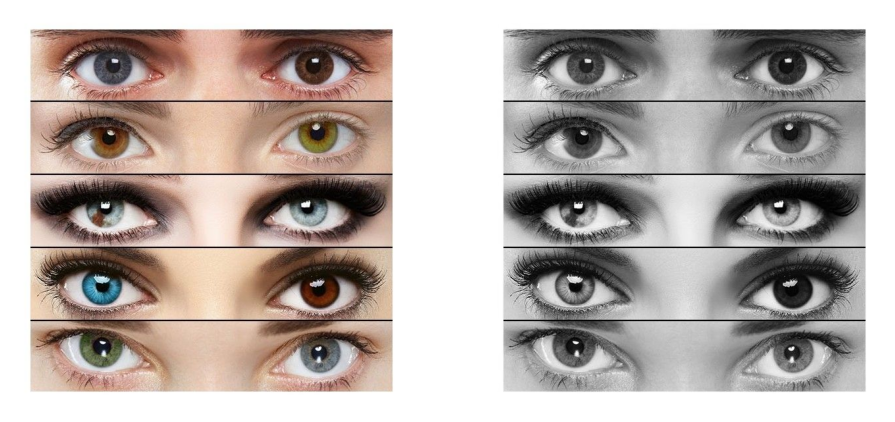

In [173]:
# Lectura de la imágen
img = cv.imread('eyes.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(8,8), dpi=140)
ax1=plt.subplot(121)
ax1.imshow(img)
ax1.axis("off");
ax1=plt.subplot(122)
ax1.imshow(gray, 'gray')
ax1.axis("off");

In [174]:
# Suavizar la imagen
# bgray = cv.GaussianBlur(gray,(5,5),0)
bgray = cv.medianBlur(gray, 9)

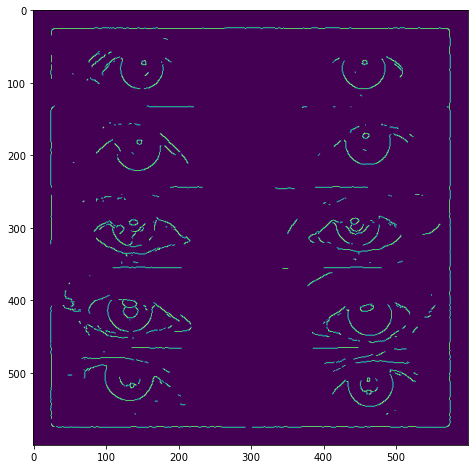

In [175]:
# Obtenemos los bordes por Canny (Solo para inspeccionar el efecto del filtrado)
edges = cv.Canny(bgray,150,160,apertureSize = 3)
plt.figure(figsize=(8,8))
plt.imshow(edges)
plt.show()

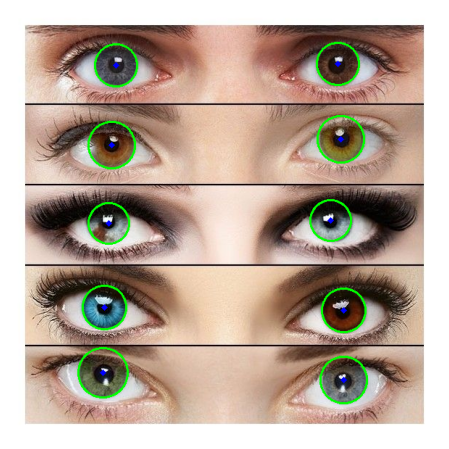

In [176]:
# Obtenemos los cícrulos

img_out = img.copy()
circles = cv.HoughCircles(bgray,cv.HOUGH_GRADIENT,1,minDist=40,param1=40,param2=30,minRadius=22,maxRadius=40)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    
plt.figure(figsize=(8,8))
plt.imshow(img_out)
plt.axis("off");

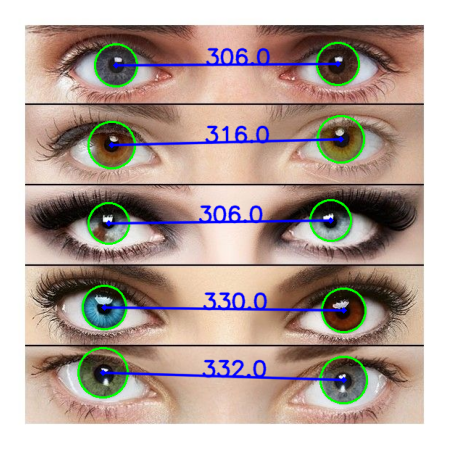

In [182]:
# Calculamos la distancia entre los centros de los circulos detectados

order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]
img_out2 = img_out.copy()

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2]
    eye2 = s_circles[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 30
    y_c = int((eye2[1] + eye1[1])/2)
    
    cv.line(img_out2,tuple(eye1[:2]),tuple(eye2[:2]),(0,0,255),2,cv.LINE_AA)
    cv.putText(img_out2,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv.LINE_AA)
    
plt.figure(figsize=(8,8))
plt.imshow(img_out2)
plt.axis("off");

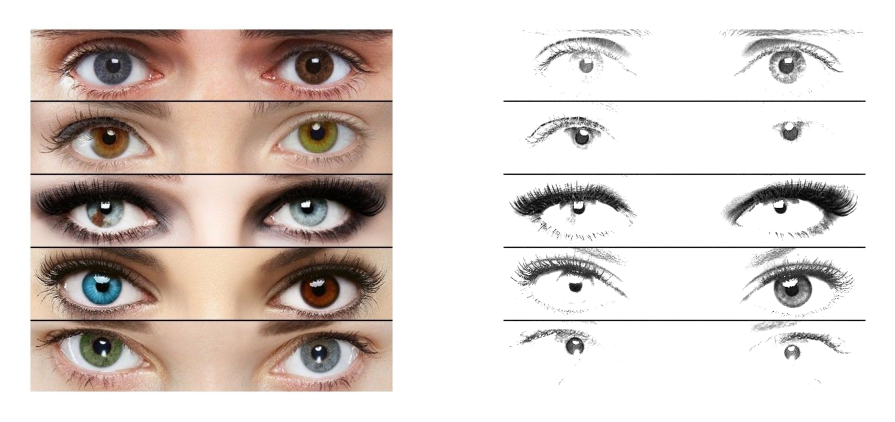

In [441]:
# Lectura de la imágen
img = cv.imread('eyes.jpg')

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

contraste=300
img_mod=(1+contraste/100)*gray
img_mod=img_mod.round()
np.clip(img_mod, 0, 255, out=img_mod)
gray=img_mod.astype('uint8')

fig = plt.figure(figsize=(8,8), dpi=140)
ax1=plt.subplot(121)
ax1.imshow(img)
ax1.axis("off");
ax1=plt.subplot(122)
ax1.imshow(gray, 'gray')
ax1.axis("off");

In [442]:
# Suavizar la imagen
# bgray = cv.GaussianBlur(gray,(5,5),0)
bgray = cv.medianBlur(gray, 3)

# plt.figure(figsize=(8,8), dpi=140)
# plt.imshow(bgray, 'gray')
# plt.axis("off")

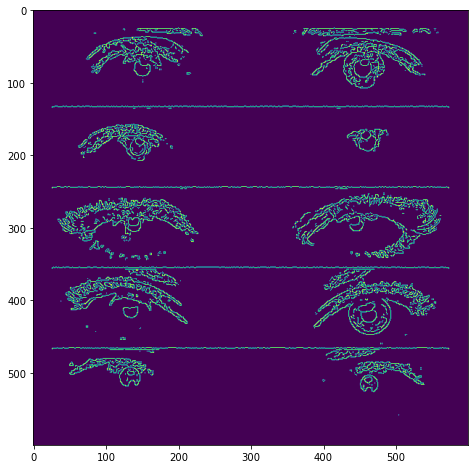

In [443]:
# Obtenemos los bordes por Canny (Solo para inspeccionar el efecto del filtrado)
edges = cv.Canny(bgray,150,160,apertureSize = 3)
plt.figure(figsize=(8,8))
plt.imshow(edges)
plt.show()

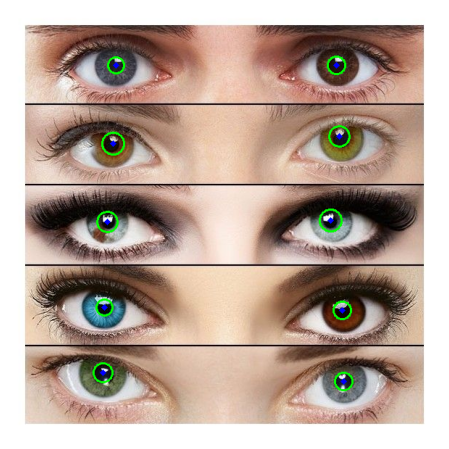

In [449]:
# Obtenemos los cícrulos

img2_out = img.copy()
circles = cv.HoughCircles(bgray,cv.HOUGH_GRADIENT,1,minDist=60,param1=80,param2=16,minRadius=10,maxRadius=16)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img2_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img2_out,(i[0],i[1]),2,(0,0,255),3)
    
plt.figure(figsize=(8,8))
plt.imshow(img2_out)
plt.axis("off"); 

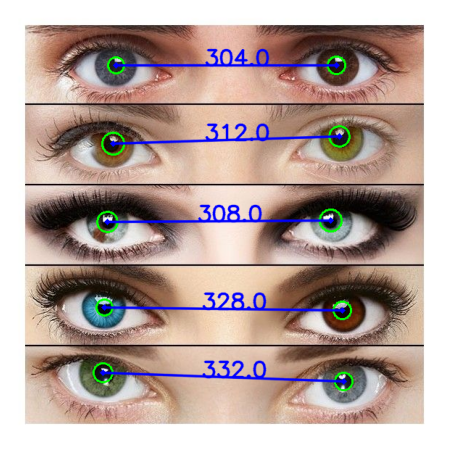

In [451]:
# Calculamos la distancia entre los centros de los circulos detectados

order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]
img2_out2 = img2_out.copy()

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2]
    eye2 = s_circles[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 30
    y_c = int((eye2[1] + eye1[1])/2)
    
    cv.line(img2_out2,tuple(eye1[:2]),tuple(eye2[:2]),(0,0,255),2,cv.LINE_AA)
    cv.putText(img2_out2,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv.LINE_AA)
    
plt.figure(figsize=(8,8))
plt.imshow(img2_out2)
plt.axis("off");